<a href="https://colab.research.google.com/github/prachsk/Marklund_Lab/blob/main/Trial_1/Python_NB/scIB_GooGleColab_Trial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of single-cell RNA-seq data: Integrating ENS sc/sn RNA seq datasets 
This notebook was written by Khomgrit Morarach and Prach Techameena, and is based on theislab/scib  

https://github.com/theislab/scib

## Setup

In [ ]:
# This is  used to time the running of the notebook
import time
start_time = time.time()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install python packages

In [ ]:
%%time
#These packages (older versions) are already pre installed in GooGle Colab  
!pip install rpy2 --upgrade
!pip install scikit-learn --upgrade

#install scIB from GitHub repository
!pip install git+https://github.com/theislab/scib.git

  Cloning https://github.com/theislab/scib.git to /tmp/pip-req-build-00mt9v8h
  Running command git clone -q https://github.com/theislab/scib.git /tmp/pip-req-build-00mt9v8h
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 20.1 MB 24.9 MB/s 
     |████████████████████████████████| 8.8 MB 12.1 MB/s 
     |████████████████████████████████| 91 kB 6.8 MB/s 
     |████████████████████████████████| 2.9 MB 38.8 MB/s 
     |████████████████████████████████| 2.1 MB 38.9 MB/s 
     |████████████████████████████████| 1.1 MB 59.6 MB/s 
     |████████████████████████████████| 3.2 MB 48.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for scib: filename=scib-1.0.0-1-py3-none-any.whl size=67281 sha256=836129a3ca0c3a26370323380c644ae6f7c6eb0a01

CPU times: user 645 ms, sys: 137 ms, total: 782 ms
Wall time: 52.2 s


### Install conda

In [ ]:
%%time
# install conda
!!which python
!python --version


Python 3.7.12
CPU times: user 20.2 ms, sys: 12.7 ms, total: 32.9 ms
Wall time: 244 ms


In [ ]:
!!echo $PYTHONPATH
!%env PYTHONPATH=

/bin/bash: line 0: fg: no job control


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-11-22 17:56:02--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-11-22 17:56:02--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 43.8M 1s
    50K .......... .......... .......... .......... ..........  0%

In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda --version

conda 4.5.4


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [ ]:
%%bash
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes
source /usr/local/etc/profile.d/conda.sh
conda init 


Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wheel-0.37.0               |     pyhd3eb1b0_1          31 KB
    pyopenssl-21.0.0           |     pyhd3eb1b0_1          48 KB
    openssl-1.1.1l             |       h7f8727e_0         3.8 MB
    cffi-1.14.6                |   py37h400218f_0         224 KB
    tk-8.6.11                  |       h1ccaba5_0         3.2 MB
    ncurses-6.3                |       h7f8727e_2         1.0 MB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    zlib-1.2.11                |       h7b6447c_3         120 KB
    pysocks-1.7.1              |           py37_1          27 KB
    xz-5.2.5                   |       h7b6447c_0         438 KB
    libstdcxx-ng-9.1.0         |       hdf63c60_0   

wheel-0.37.0         |   31 KB | ########## | 100% 
pyopenssl-21.0.0     |   48 KB | ########## | 100% 
openssl-1.1.1l       |  3.8 MB | ########## | 100% 
cffi-1.14.6          |  224 KB | ########## | 100% 
tk-8.6.11            |  3.2 MB | ########## | 100% 
ncurses-6.3          |  1.0 MB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
zlib-1.2.11          |  120 KB | ########## | 100% 
pysocks-1.7.1        |   27 KB | ########## | 100% 
xz-5.2.5             |  438 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
setuptools-58.0.4    |  979 KB | ########## | 100% 
charset-normalizer-2 |   33 KB | ########## | 100% 
ca-certificates-2021 |  121 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  637 KB | ########## | 100% 
urllib3-1.26.7       |  104 KB | ########## | 100% 
python-3.7.11        | 52.9 MB | ########## | 100% 
pycparser-2.21       |   94 KB | ########## | 100% 
readline-8.1         |  464 KB | ########## | 100% 
libffi-3.3  

In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
!ls /usr/local/lib/python3.6/dist-packages

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

In [ ]:
!conda env create -f /content/drive/MyDrive/scib-master/envs/scIB-python.yml python=3.7

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!conda env create -f /content/drive/MyDrive/scib-master/envs/scIB-R-integration.yml python=3.7

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

send2trash-1.5.0     | 16 KB     | : 100% 1.0/1 [00:00<00:00,  4.57it/s]
terminado-0.8.3      | 26 KB     | : 100% 1.0/1 [00:00<00:00,  6.02it/s]
cairo-1.14.12        | 906 KB    | : 100% 1.0/1 [00:00<00:00,  4.24it/s]
r-assertthat-0.2.1   | 74 KB     | : 100% 1.0/1 [00:00<00:00, 19.28it/s]
freetype-2.9.1       | 550 KB    | : 100% 1.0/1 [00:00<00:00,  4.71it/s]
openssl-1.1.1d       | 2.5 MB    | : 100% 1.0/1 [00:00<00:00,  3.77it/s]
r-pbdzmq-0.3_3       | 380 KB    | 

In [ ]:
!conda env create -f /content/drive/MyDrive/scib-master/envs/scIB-R-conversion.yml python=3.7


SpecNotFound: Invalid name, try the format: user/package



In [ ]:
!conda info --envs

# conda environments:
#
base                  *  /usr/local
scIB-R-integration       /usr/local/envs/scIB-R-integration
scIB-python              /usr/local/envs/scIB-python



In [ ]:
!source activate scIB-python && conda init && cp /content/drive/MyDrive/scib-master/envs/env_vars_activate.sh /usr/local/envs/scIB-python/etc/conda/activate.d
!source activate scIB-python && conda init && cp /content/drive/MyDrive/scib-master/envs/env_vars_deactivate.sh /usr/local/envs/scIB-python/etc/conda/deactivate.d


no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.
no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/

In [ ]:
!source activate scIB-R-conversion && conda init &&cp /content/drive/MyDrive/scib-master/envs/env_vars_activate.sh /usr/local/envs/scIB-R-conversion/etc/conda/activate.d
!source activate scIB-R-conversion && conda init && cp /content/drive/MyDrive/scib-master/envs/env_vars_deactivate.sh /usr/local/envs/scIB-R-conversion/etc/conda/deactivate.d


Could not find conda environment: scIB-R-conversion
You can list all discoverable environments with `conda info --envs`.

Could not find conda environment: scIB-R-conversion
You can list all discoverable environments with `conda info --envs`.



In [ ]:
!source activate scIB-R-integration && conda init && cp /content/drive/MyDrive/scib-master/envs/env_vars_activate.sh /usr/local/envs/scIB-R-integration/etc/conda/activate.d
!source activate scIB-R-integration && conda init && cp /content/drive/MyDrive/scib-master/envs/env_vars_deactivate.sh /usr/local/envs/scIB-R-integration/etc/conda/deactivate.d

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.
no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/

In [ ]:
%%bash
git clone https://github.com/KrishnaswamyLab/SAUCIE.git --branch dependabot/pip/tensorflow-2.3.1
pip install -r SAUCIE/requirements.txt


Cloning into 'SAUCIE'...
fatal: Remote branch dependabot/pip/tensorflow-2.3.1 not found in upstream origin
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'SAUCIE/requirements.txt'


In [ ]:
import sys
sys.path.append("/content/SAUCIE")

In [ ]:
%load_ext rpy2.ipython

In [ ]:
!source activate scIB-python && conda init
%R devtools::install_github('theislab/kBET')

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Downloading GitHub repo theislab/kBET@HEAD

R[write to console]: Installing 1 packages: FNN

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/FNN_1.1.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 78492 bytes (76 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d6e35b206/theislab-kBET-4c9dafa/DESCRIPTION’ (341ms)
─  preparing ‘kBET’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘kBET_0.99.6.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'kBET'


In [ ]:
!source activate scIB-python
%R library(kBET)

'kBET','tools','stats',...,'datasets','methods','base'


In [ ]:
!source activate scIB-R-integration && conda init
!sudo apt-get update
!sudo apt-get -y install libcurl4-openssl-dev libssl-dev
%R devtools::install_github("elswob/SCRAN")
%R devtools::install_github("satijalab/seurat")

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InR

R[write to console]: Downloading GitHub repo elswob/SCRAN@HEAD



✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d6be9f5fa/elswob-SCRAN-b2ed0f1/DESCRIPTION’
─  preparing ‘SCRAN’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SCRAN_0.1.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo satijalab/seurat@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                            
2: CRAN packages only             
3: None                           
4: openssl (1.4.3 -> 1.4.5) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 3


R[write to console]: Installing 67 packages: sitmo, BH, RcppEigen, spatstat.utils, tensor, abind, polyclip, deldir, spatstat.data, sass, later, promises, plyr, parallelly, listenv, globals, future, bitops, caTools, gtools, lazyeval, bslib, sourcetools, fontawesome, xtable, httpuv, png, here, dqrng, RcppProgress, irlba, RcppAnnoy, RSpectra, goftest, spatstat.sparse, spatstat.geom, RcppArmadillo, matrixStats, gridExtra, reshape2, future.apply, gplots, crosstalk, htmlwidgets, shiny, zoo, igraph, reticulate, uwot, spatstat.core, SeuratObject, sctransform, scattermore, Rtsne, ROCR, RANN, plotly, pbapply, patchwork, miniUI, lmtest, leiden, ica, ggridges, ggrepel, fitdistrplus, cowplot

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sitmo_2.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 132964 bytes (129 KB)

R[write 

✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d5f075593/satijalab-seurat-1843511/DESCRIPTION’ (374ms)
─  preparing ‘Seurat’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  installing the package to process help pages
─  saving partial Rd database (1m 21.6s)
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘Seurat_4.0.5.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'Seurat'


In [ ]:
!source activate scIB-python && conda init
%R library(Seurat)
%R library(SCRAN)

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

R[write to console]: Attaching SeuratObject



'SCRAN','SeuratOb...,'Seurat',...,'datasets','methods','base'


In [ ]:
!source activate scIB-python && conda init
!sudo apt-get install libx11-dev
!sudo apt install r-cran-cairo

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  r-cran-cairo
0 upgraded, 1 newly

In [ ]:
!source activate scIB-R-integration && conda init
%R devtools::install_github("jokergoo/ComplexHeatmap")
#%R devtools::install_github("kharchenkolab/p2data")
#%R devtools::install_github('kharchenkolab/pagoda2', build_vignettes = TRUE)
#%R devtools::install_github("kharchenkolab/conos")

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Downloading GitHub repo jokergoo/ComplexHeatmap@HEAD

R[write to console]: Installing 12 packages: iterators, BiocGenerics, foreach, S4Vectors, GlobalOptions, rjson, shape, doParallel, IRanges, clue, GetoptLong, circlize

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d10523c47/jokergoo-ComplexHeatmap-5c6415b/DESCRIPTION’ (376ms)
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (352ms)
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.11.1.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'ComplexHeatmap'


In [ ]:
!source activate scIB-R-integration && conda init
#%R devtools::install_github("jokergoo/ComplexHeatmap")
%R devtools::install_github("kharchenkolab/p2data")
%R devtools::install_github('kharchenkolab/pagoda2', build_vignettes = F)
%R devtools::install_github("kharchenkolab/conos")

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Downloading GitHub repo kharchenkolab/p2data@HEAD



✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d14a1d7e3/kharchenkolab-p2data-7d4c0e1/DESCRIPTION’ (334ms)
─  preparing ‘p2data’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘p2data_1.0.0.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo kharchenkolab/pagoda2@HEAD

R[write to console]: Installing 15 packages: R.methodsS3, triebeard, pROC, pbmcapply, R.oo, RcppSpdlog, urltools, sccore, Rook, RMTstat, R.utils, N2R, fastcluster, drat, dendsort

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/R.methodsS3_1.8.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 23717 bytes (23 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d494eb64e/kharchenkolab-pagoda2-df560c9/DESCRIPTION’ (373ms)
─  preparing ‘pagoda2’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘pagoda2_1.0.7.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo kharchenkolab/conos@HEAD

R[write to console]: Installing 5 packages: grr, Matrix.utils, viridis, leidenAlg, dendextend

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/grr_0.9.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 8285 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

✔  checking for file ‘/tmp/RtmpQ7ARDY/remotes3d8e81031/kharchenkolab-conos-724ea9d/DESCRIPTION’ (369ms)
─  preparing ‘conos’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘conos_1.4.4.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'conos'


In [ ]:
!source activate scIB-R-integration && conda init
#%R devtools::install_github("jokergoo/ComplexHeatmap")
#%R devtools::install_github("kharchenkolab/p2data")
%R devtools::install_github('kharchenkolab/pagoda2', build_vignettes = F)
#%R devtools::install_github("kharchenkolab/conos")

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Skipping install of 'pagoda2' from a github remote, the SHA1 (df560c98) has not changed since last install.
  Use `force = TRUE` to force installation



'pagoda2'


In [ ]:
!source activate scIB-R-integration && conda init
%R library(Seurat)
%R library(SCRAN)
%R library(pagoda2)
%R library(conos)

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.


R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: 
Attaching package: ‘conos’


R[write to console]: The following objects are masked from ‘package:pagoda2’:

    buildWijMatrix, projectKNNs, sgdBatches




'conos','pagoda2','igraph',...,'datasets','methods','base'


## Basic QC

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=100)

In [ ]:
# load the unfiltered matrix
results_file = 'P12456_7002.h5ad'  # the file that will store the analysis results
adata = anndata.read_h5ad("output/counts_unfiltered/adata.h5ad")
adata.var["gene_id"] = adata.var.index.values

t2g = pd.read_csv("t2g.txt", header=None, names=["tid", "gene_id", "gene_name"], sep="\t")
t2g.index = t2g.gene_id
t2g = t2g.loc[~t2g.index.duplicated(keep='first')]

adata.var["gene_name"] = adata.var.gene_id.map(t2g["gene_name"])
adata.var.index = adata.var["gene_name"]

adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

## Integration trial1

In [ ]:
!conda activate scIB-python && conda init
!conda install -c conda-forge python-annoy
!pip install scanorama

     |████████████████████████████████| 15.7 MB 79 kB/s 
     |████████████████████████████████| 23.2 MB 55.1 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 11.2 MB 38.3 MB/s 
     |████████████████████████████████| 3.1 MB 38.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.1 MB/s 
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
     |████████████████████████████████| 880 kB 21.3 MB/s 
     |████████████████████████████████| 247 kB 63.8 MB/s 
  Using cached setuptools_scm-6.3.2-py3-none-any.whl (33 kB)
     |████████████████████████████████| 306 kB 65.5 MB/s 
  Using cached tomli-1.2.2-py3-none-any.whl (12 kB)
  Created wheel for intervaltree: filename=intervaltree-2.1.0-py3-none-any.whl size=27625 sha256=26c333d9215b36a23b872590ed81ccd979969fb5e49307ed61aea17cc317d43b
  Stored in directory: /root/.cache/pip/wheels/b2/77/e0/18e2c0f922ea36c4658f919ee41c4effb6e8

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/cycler-0.11.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/intervaltree-2.1.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/joblib-1.1.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/kiwisolver-1.3.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  f

In [ ]:
!pip3 install leidenalg

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
  Using cached python_igraph-0.9.8-py3-none-any.whl
  Using cached igraph-0.9.8-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.2 MB)
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/igraph-0.9.8.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/python_igraph-0.9.8.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/texttable-1.6.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
import scib
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.5 scipy==1.4.1 pandas==1.1.5 scikit-learn==1.0.1 statsmodels==0.10.2 python-igraph==0.9.8 louvain==0.7.0 pynndescent==0.5.5


In [4]:
results_file = '/content/drive/MyDrive/Lab/Computations/Trial_1/Write/integration_trial1.h5ad'

In [ ]:
pnas_adata = sc.read_h5ad('/content/drive/MyDrive/Lab/Computations/Trial_1/R/ens.combined.h5ad')
pnas_adata.var_names_make_unique()
sc.pp.filter_cells(pnas_adata, min_genes=0)
sc.pp.filter_genes(pnas_adata, min_cells=0)

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:183: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


In [ ]:
pnas_adata.obs["Source"] = "May-Zhang"
pnas_adata.obs = pnas_adata.obs.rename(columns = {"nCount_RNA":"total_counts", "nFeature_RNA":"n_genes_by_counts", "orig.ident":"batch"})
pnas_adata.obs

,batch,total_counts,n_genes_by_counts,integrated_snn_res.0.5,seurat_clusters,n_genes,Source
_1_AAACCCAAGAGAGAAC-1,GSM4635433_10x-Run0052_Female-Colon-Neurons-Un...,13464.0,4196,1,1,599,May-Zhang
_1_AAACCCAAGTGATAGT-1,GSM4635433_10x-Run0052_Female-Colon-Neurons-Un...,15064.0,3977,14,14,625,May-Zhang
_1_AAACCCACATATGAAG-1,GSM4635433_10x-Run0052_Female-Colon-Neurons-Un...,11059.0,3481,4,4,550,May-Zhang
_1_AAACCCATCTGTCCCA-1,GSM4635433_10x-Run0052_Female-Colon-Neurons-Un...,12346.0,3785,1,1,560,May-Zhang
_1_AAACGAAAGCCTTTCC-1,GSM4635433_10x-Run0052_Female-Colon-Neurons-Un...,10949.0,3482,4,4,570,May-Zhang
...,...,...,...,...,...,...,...
_9_TTTGGTTGTACACGTT-1,GSM4635446_10x-Run0072_Female-Duodenum-Neurons...,23039.0,5384,8,8,727,May-Zhang
_9_TTTGTTGAGAGCCGAT-1,GSM4635446_10x-Run0072_Female-Duodenum-Neurons...,8821.0,3303,15,15,498,May-Zhang
_9_TTTGTTGGTACGGTTT-1,GSM4635446_10x-Run0072_Female-Duodenum-Neurons...,16767.0,5050,9,9,633,May-Zhang
_9_TTTGTTGGTCACAGAG-1,GSM4635446_10x-Run0072_Female-Duodenum-Neurons...,19428.0,5407,3,3,768,May-Zhang


In [ ]:
mp_adata = sc.read_h5ad('/content/drive/MyDrive/Lab/Computations/Trial_1/Write/adata.h5ad')
mp_adata.var_names_make_unique()
mp_adata.obs["Source"] = "Khom_MP"
mp_adata.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,louvain,Source
AAACCCACAGTCGCAC-1-0,0,5433,5433,26419.0,1162.0,4.398350,8,7,Khom_MP
AAACCCAGTAGGTACG-1-0,0,3814,3814,14427.0,972.0,6.737367,11,12,Khom_MP
AAACCCATCGAACTCA-1-0,0,4931,4931,20205.0,2241.0,11.091314,22,23,Khom_MP
AAACCCATCGCCTCTA-1-0,0,5044,5043,24650.0,1216.0,4.933063,0,11,Khom_MP
AAACGAAAGATGCAGC-1-0,0,2890,2890,8803.0,421.0,4.782461,5,5,Khom_MP
...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGTGGAT-1-1,1,3360,3358,8856.0,1827.0,20.630081,7,8,Khom_MP
TTTGTTGTCAGCACCG-1-1,1,3096,3096,8355.0,1395.0,16.696589,2,8,Khom_MP
TTTGTTGTCAGGCGAA-1-1,1,7274,7273,59484.0,3658.0,6.149553,13,15,Khom_MP
TTTGTTGTCCCTCATG-1-1,1,621,621,875.0,31.0,3.542857,1,0,Khom_MP


In [ ]:
adata = pnas_adata.concatenate(mp_adata)
adata.obs

,batch,total_counts,n_genes_by_counts,integrated_snn_res.0.5,seurat_clusters,n_genes,Source,total_counts_mt,pct_counts_mt,leiden,louvain
_1_AAACCCAAGAGAGAAC-1-0,0,13464.0,4196,1.0,1.0,599,May-Zhang,NaN,NaN,NaN,NaN
_1_AAACCCAAGTGATAGT-1-0,0,15064.0,3977,14.0,14.0,625,May-Zhang,NaN,NaN,NaN,NaN
_1_AAACCCACATATGAAG-1-0,0,11059.0,3481,4.0,4.0,550,May-Zhang,NaN,NaN,NaN,NaN
_1_AAACCCATCTGTCCCA-1-0,0,12346.0,3785,1.0,1.0,560,May-Zhang,NaN,NaN,NaN,NaN
_1_AAACGAAAGCCTTTCC-1-0,0,10949.0,3482,4.0,4.0,570,May-Zhang,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGTGGAT-1-1-1,1,8856.0,3358,NaN,NaN,3360,Khom_MP,1827.0,20.630081,7,8
TTTGTTGTCAGCACCG-1-1-1,1,8355.0,3096,NaN,NaN,3096,Khom_MP,1395.0,16.696589,2,8
TTTGTTGTCAGGCGAA-1-1-1,1,59484.0,7273,NaN,NaN,7274,Khom_MP,3658.0,6.149553,13,15
TTTGTTGTCCCTCATG-1-1-1,1,875.0,621,NaN,NaN,621,Khom_MP,31.0,3.542857,1,0


In [ ]:
del adata.obs["integrated_snn_res.0.5"]
del adata.obs["seurat_clusters"]
del adata.obs["total_counts_mt"]
del adata.obs["pct_counts_mt"]
del adata.obs["leiden"]
del adata.obs["louvain"]

In [ ]:
adata.var

,features-0,n_cells-0,n_cells-1,gene_ids-1,feature_types-1,mt-1,n_cells_by_counts-1,mean_counts-1,pct_dropout_by_counts-1,total_counts-1,highly_variable-1,means-1,dispersions-1,dispersions_norm-1,mean-1,std-1
Nmu,Nmu,3739,668,ENSMUSG00000029236,Gene Expression,False,668,0.662363,92.691466,6054.0,True,0.295791,2.526377,2.236987,0.093511,0.417114
Sst,Sst,5584,1863,ENSMUSG00000004366,Gene Expression,False,1863,6.537090,79.617068,59749.0,True,1.620581,6.282880,10.330240,0.244610,0.770012
Adgrg6,Adgrg6,4013,1207,ENSMUSG00000039116,Gene Expression,False,1207,1.207221,86.794311,11034.0,True,0.513610,2.552510,3.676056,0.182060,0.565815
Cdh9,Cdh9,2032,430,ENSMUSG00000025370,Gene Expression,False,430,0.126696,95.295405,1158.0,True,0.059016,1.513060,0.948081,0.031804,0.175625
Zfp804a,Zfp804a,5888,2086,ENSMUSG00000070866,Gene Expression,False,2086,1.037309,77.177243,9481.0,True,0.373040,2.015879,2.325181,0.175627,0.458055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cldn15,Cldn15,3752,231,ENSMUSG00000001739,Gene Expression,False,231,0.028337,97.472648,259.0,True,0.018393,1.345679,0.735177,0.011442,0.088445
Ltbp4,Ltbp4,3952,600,ENSMUSG00000040488,Gene Expression,False,600,0.077024,93.435449,704.0,True,0.085276,1.796722,1.308890,0.043126,0.207947
Serpinh1,Serpinh1,3815,1798,ENSMUSG00000070436,Gene Expression,False,1798,0.577024,80.328228,5274.0,True,0.442195,1.906459,2.049736,0.201839,0.526685
Slc25a53,Slc25a53,5348,1255,ENSMUSG00000044348,Gene Expression,False,1255,0.154705,86.269147,1414.0,True,0.091057,1.204681,0.555833,0.061345,0.190762


In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adata = scib.ig.scanorama(adata, batch='batch')

Found 664 genes among all datasets
[[0.         0.54715536]
 [0.         0.        ]]
Processing datasets (0, 1)


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [ ]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:02)


In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)


In [ ]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


In [ ]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 37 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


In [ ]:
adata.write(results_file)

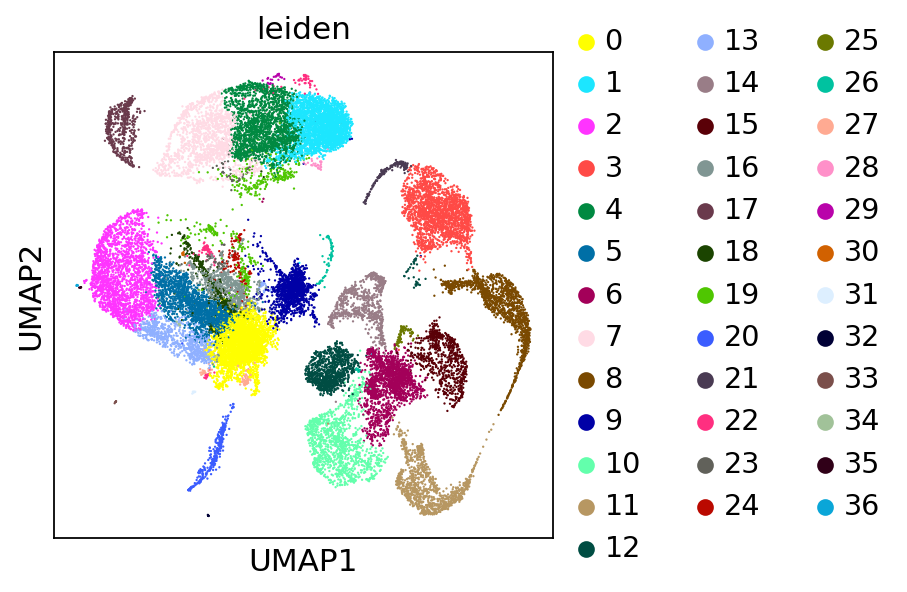

In [ ]:
sc.pl.umap(adata, color='leiden')

ranking genes


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


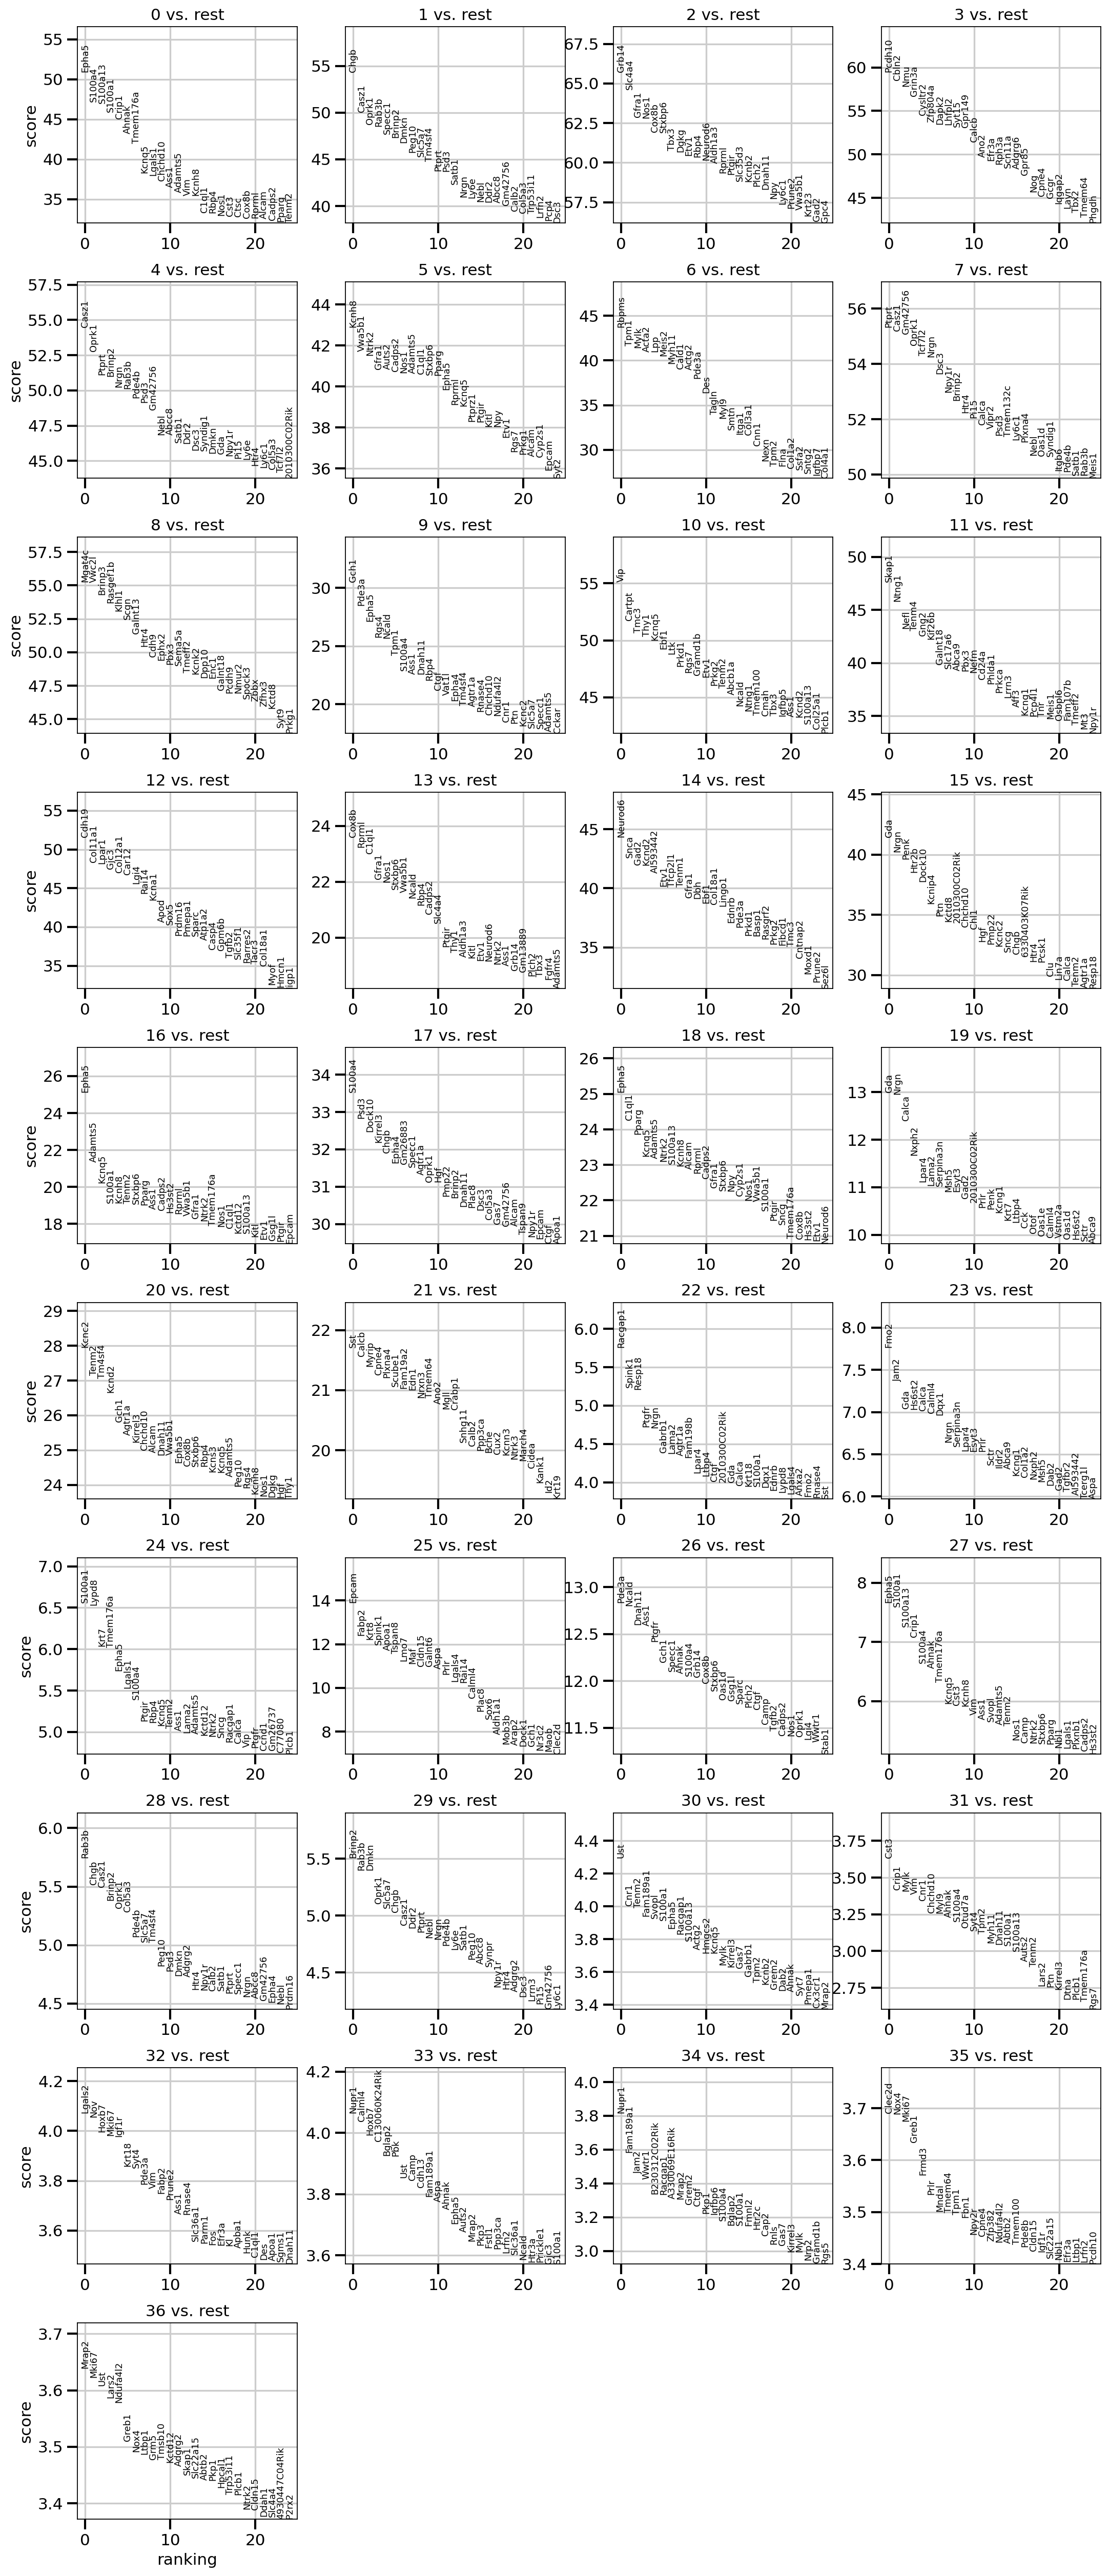

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)